In [5]:
import pandas as pd
import numpy as np

In [6]:
titanic = pd.read_csv("titanic_train.csv")
df = titanic.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
del df["Name"]
del df["PassengerId"]
del df["Ticket"]
del df["Cabin"]
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [9]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
del df["Fare"]
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [11]:
survived = df[df.Embarked=="S"][df.Survived==1].shape[0]
survived

/home/hellraiser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


217

In [12]:
def getNumber(str):
    if str=="male":
        return 1
    else:
        return 0
df["gender"] =df["Sex"].apply(getNumber)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,gender
0,0,3,male,22.0,1,0,S,1
1,1,1,female,38.0,1,0,C,0
2,1,3,female,26.0,0,0,S,0
3,1,1,female,35.0,1,0,S,0
4,0,3,male,35.0,0,0,S,1


In [13]:
del df["Sex"]
df.head()

,Survived,Pclass,Age,SibSp,Parch,Embarked,gender
0,0,3,22.0,1,0,S,1
1,1,1,38.0,1,0,C,0
2,1,3,26.0,0,0,S,0
3,1,1,35.0,1,0,S,0
4,0,3,35.0,0,0,S,1


In [14]:
import matplotlib.pyplot as plt

577
314


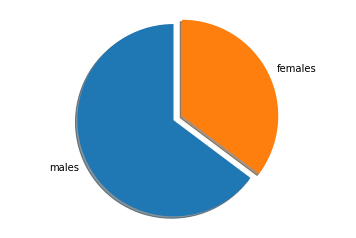

In [19]:
males = (df["gender"]==1).sum()
females = (df["gender"]==0).sum()
print(males)
print(females)
sizes = [males,females]
labels = ["males","females"]
explode = (0.1,0)
plt.pie(sizes, explode=explode, labels=labels, shadow=True, startangle =90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [26]:
meanAS= df[df.Survived==1].Age.mean()
meanAS
meanNS=df[df.Survived==0].Age.mean()
meanNS

30.62617924528302

In [24]:
df["age"]=np.where(pd.isnull(df.Age) & df["Survived"]==1  ,meanAS, df["Age"])
df

,Survived,Pclass,Age,SibSp,Parch,Embarked,gender,age
0,0,3,22.0,1,0,S,1,22.00000
1,1,1,38.0,1,0,C,0,38.00000
2,1,3,26.0,0,0,S,0,26.00000
3,1,1,35.0,1,0,S,0,35.00000
4,0,3,35.0,0,0,S,1,35.00000
5,0,3,NaN,0,0,Q,1,NaN
6,0,1,54.0,0,0,S,1,54.00000
7,0,3,2.0,3,1,S,1,2.00000
8,1,3,27.0,0,2,S,0,27.00000
9,1,2,14.0,1,0,C,0,14.00000


In [28]:
df.age.fillna(meanNS,inplace=True)
df

,Survived,Pclass,Age,SibSp,Parch,Embarked,gender,age
0,0,3,22.0,1,0,S,1,22.000000
1,1,1,38.0,1,0,C,0,38.000000
2,1,3,26.0,0,0,S,0,26.000000
3,1,1,35.0,1,0,S,0,35.000000
4,0,3,35.0,0,0,S,1,35.000000
5,0,3,NaN,0,0,Q,1,30.626179
6,0,1,54.0,0,0,S,1,54.000000
7,0,3,2.0,3,1,S,1,2.000000
8,1,3,27.0,0,2,S,0,27.000000
9,1,2,14.0,1,0,C,0,14.000000


In [29]:
del df["Age"]
df

,Survived,Pclass,SibSp,Parch,Embarked,gender,age
0,0,3,1,0,S,1,22.000000
1,1,1,1,0,C,0,38.000000
2,1,3,0,0,S,0,26.000000
3,1,1,1,0,S,0,35.000000
4,0,3,0,0,S,1,35.000000
5,0,3,0,0,Q,1,30.626179
6,0,1,0,0,S,1,54.000000
7,0,3,3,1,S,1,2.000000
8,1,3,0,2,S,0,27.000000
9,1,2,1,0,C,0,14.000000


In [ ]:
df.rename(columns={"age":"Age"},inplace=True)
df.rename(columns={""})